In [1]:
# import sklearn
# print(sklearn.__version__)

In [2]:
from IPython.display import HTML

style = """
<style>
#header, div.unselected { display: none !important }
#notebook, .container { padding: 0 !important }
#site { height: 100% !important }
</style>
"""
style = ""

HTML(style)

# Dữ liệu ảnh chữ số viết tay 

[Nguồn dữ liệu](http://www.amlbook.com/support.html)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv("digit-train.txt", sep="\s+", header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [5]:
# train_data.info(verbose=True, null_counts=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Columns: 257 entries, 0 to 256
dtypes: float64(257)
memory usage: 14.3 MB


In [6]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,3.903443,-0.996417,-0.981138,-0.951153,-0.887738,-0.773468,-0.610302,-0.368991,-0.045769,-0.052641,...,-0.198547,0.139823,0.116439,-0.314108,-0.653711,-0.837858,-0.922194,-0.957393,-0.979290,-0.994678
std,2.996386,0.051713,0.151202,0.244264,0.360516,0.502659,0.628710,0.716032,0.768304,0.752979,...,0.772895,0.752984,0.757336,0.725859,0.582555,0.414646,0.300830,0.228700,0.158998,0.066056
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-0.950000,...,-1.000000,-0.661500,-0.738000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.719000,0.061000,0.002000,...,-0.353000,0.368000,0.336000,-0.579000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.962000,-0.391000,0.254500,0.696000,0.674500,...,0.554000,0.835000,0.815000,0.346000,-0.504500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,9.000000,0.638000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


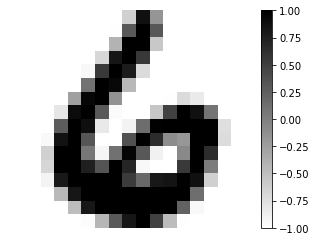

In [7]:
plt.imshow(train_data.iloc[0, 1:].values.reshape(16, 16), cmap=plt.cm.binary)
plt.axis("off")
plt.colorbar()

In [8]:
train_raw_X = train_data.drop(0, axis=1).values
train_raw_X.shape

(7291, 256)

In [9]:
# Ở đây, ta xét bài toán phân 3 lớp: 
# số 0 (y = 1), số 1 (y = 2) và các số còn lại (y = 3)
train_y = train_data[0].copy()
train_y[(train_y != 0) & (train_y != 1)] = 3
train_y[train_y == 1] = 2
train_y[train_y == 0] = 1
print(train_y.shape)
print(train_y[:10])

(7291,)
0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
6    3.0
7    2.0
8    1.0
9    2.0
Name: 0, dtype: float64


Câu hỏi cần trả lời: <font color=blue>output - ảnh chữ số 0 hay 1 hay khác - </font> được tính như thế nào từ <font color=blue>input - ảnh chữ số viết tay (kích thước $16\times16$)</font>?

# Tiền xử lý
Mỗi ảnh hiện giờ được biểu diễn bởi 256 giá trị ứng với 256 pixel. Từ 256 pixel này, ta sẽ tính-toán/rút-trích 2 đặc trưng là "intensity" và "symmetry", và sau đó sẽ dùng 2 đặc trưng này để biểu diễn ảnh.
- "intensity": cho biết giá trị pixel trung bình của ảnh. Ví dụ, ảnh số 1 nhìn chung sẽ có sẽ có "intensity" thấp hơn ảnh các số khác.
- "symmetry" cho biết mức độ đối xứng của ảnh (nếu ảnh tương tự với ảnh lật theo chiều ngang và ảnh lật theo chiều dọc thì tính đối xứng cao). Ví dụ, ảnh số 1 nhìn chung sẽ có tính đối xứng cao hơn ảnh các số khác. Cụ thể, "symmetry" được tính như sau:
    - Lấy ảnh trừ đi ảnh lật theo chiều ngang, lấy trị tuyệt đối, rồi tính trung bình. Gọi kết quả tính được là s1.
    - Lấy ảnh trừ đi ảnh lật theo chiều dọc, lấy trị tuyệt đối, rồi tính trung bình. Gọi kết quả tính được là s2.
    - Symmetry = - (s1 + s2) / 2.

In [10]:
# Định nghĩa class FeatureExtracter theo dạng của 
# Transformer của Sklearn
# Lợi ích: giúp "giao tiếp tốt" với Sklearn

from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureExtracter(BaseEstimator, TransformerMixin):
class FeatureExtracter(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        F = np.empty((len(X), 2))
        F[:, 0] = X.mean(axis=1)
        for r in range(len(X)):
            img = X[r].reshape(16, 16)
            F[r, 1] = -(np.mean(np.abs(img - np.flip(img, axis=0))) + np.mean(np.abs(img - np.flip(img, axis=1)))) / 2
        return F

In [11]:
feature_extracter = FeatureExtracter()
train_X = feature_extracter.transform(train_raw_X)
train_X.shape

(7291, 2)

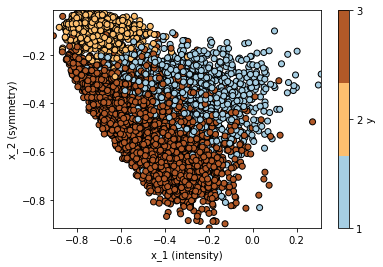

In [12]:
num_classes = len(train_y.unique())
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
            cmap=plt.cm.get_cmap("Paired", num_classes), 
            edgecolors="black")
plt.xlabel("x_1 (intensity)")
plt.ylabel("x_2 (symmetry)")
plt.colorbar(ticks=np.arange(num_classes)+1, label="y")
x1_min = train_X[:, 0].min()
x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min()
x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max);

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
preprocess_pipeline = Pipeline([("feature_extracter", FeatureExtracter()),
                               ("std_scaler", StandardScaler())])

In [15]:
train_X = preprocess_pipeline.fit_transform(train_raw_X)

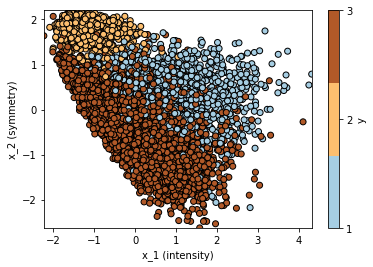

In [16]:
num_classes = len(train_y.unique())
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
            cmap=plt.cm.get_cmap("Paired", num_classes), 
            edgecolors="black")
plt.xlabel("x_1 (intensity)")
plt.ylabel("x_2 (symmetry)")
plt.colorbar(ticks=np.arange(num_classes)+1, label="y")
x1_min = train_X[:, 0].min()
x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min()
x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max);

# Huấn luyện Multinomial Logistic Regression (Softmax Regression)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg_model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

In [19]:
log_reg_model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
train_preds = log_reg_model.predict(train_X)

In [21]:
np.mean(train_preds != train_y)

0.10039775065148814

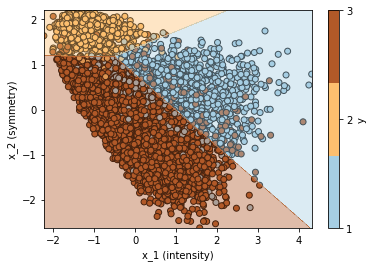

In [22]:
num_classes = len(train_y.unique())
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
            cmap=plt.cm.get_cmap("Paired", num_classes), 
            edgecolors="black")
plt.xlabel("x_1 (intensity)")
plt.ylabel("x_2 (symmetry)")
plt.colorbar(ticks=np.arange(num_classes)+1, label="y")
x1_min = train_X[:, 0].min()
x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min()
x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

x1x1, x2x2 = np.meshgrid(np.linspace(x1_min, x1_max, 10000), np.linspace(x2_min, x2_max, 5000))
pp = log_reg_model.predict(np.c_[x1x1.reshape(-1), x2x2.reshape(-1)]).reshape(x1x1.shape)
plt.contourf(x1x1, x2x2, pp, cmap=plt.cm.get_cmap("Paired", num_classes), alpha=.4);

In [23]:
log_reg_model.coef_

array([[ 1.3183116 , -0.92036773],
       [-0.63225293,  4.36020809],
       [-0.68605867, -3.43984036]])

In [24]:
log_reg_model.intercept_

array([ 1.75347175, -5.46529526,  3.71182351])

# Dùng Multinomial Logistic Regression đã huấn luyện để dự đoán với các ảnh mới

In [25]:
test_data = pd.read_csv("digit-test.txt", sep="\s+", header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [26]:
test_raw_X = test_data.drop(0, axis=1).values
test_raw_X.shape

(2007, 256)

In [27]:
test_y = test_data[0].copy()
test_y[(test_y != 0) & (test_y != 1)] = 3
test_y[test_y == 1] = 2
test_y[test_y == 0] = 1
test_y.shape

(2007,)

In [28]:
test_X = preprocess_pipeline.transform(test_raw_X)

In [29]:
test_preds = log_reg_model.predict(test_X)

In [30]:
np.mean(test_preds != test_y)

0.11559541604384654

# PCA

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca_model = PCA(n_components=2)

In [33]:
train_X = pca_model.fit_transform(train_raw_X)

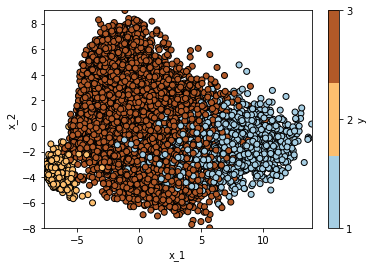

In [34]:
num_classes = len(train_y.unique())
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, 
            cmap=plt.cm.get_cmap("Paired", num_classes), 
            edgecolors="black")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.colorbar(ticks=np.arange(num_classes)+1, label="y")
x1_min = train_X[:, 0].min()
x1_max = train_X[:, 0].max()
x2_min = train_X[:, 1].min()
x2_max = train_X[:, 1].max()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max);